# 1. Cài đặt các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.simplefilter('ignore', FutureWarning)

# 2. Tải bộ dữ liệu

In [2]:
import pandas as pd

df1 = pd.read_csv('/kaggle/input/merged-dataset/merged_04.csv')
df2 = pd.read_csv('/kaggle/input/merged-dataset/merged_10.csv')

# Ghép 2 file lại với nhau
data = pd.concat([df1, df2], ignore_index=True)

# 3. Phân tích dữ liệu

## 3.1 Ý nghĩa của các trường

In [3]:
data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,datetime,row,col,AWS,CAPE,CIN,EWSS,IE,ISOR,KX,...,B10B,B11B,B12B,B14B,B16B,I2B,I4B,IRB,VSB,WVB
0,2019-04-01 00:00:00,0,104,-inf,191.375,8.750007,-421.113281,-0.000011,0.676296,37.246895,...,261.758087,281.860962,260.533417,285.551453,270.099976,281.995697,287.577820,285.776855,0.066498,243.999268
1,2019-04-01 01:00:00,0,104,-inf,227.500,19.625004,-378.875000,-0.000016,0.676296,37.902550,...,261.543610,280.488281,259.655457,283.028595,268.631256,280.489899,294.631195,283.368134,0.185901,244.379105
2,2019-04-01 02:00:00,0,104,-inf,379.500,15.172320,-283.890625,-0.000037,0.676296,36.568779,...,262.294342,282.641907,260.751495,285.330963,270.180267,283.000000,301.122345,285.456207,0.311798,245.611023
3,2019-04-01 03:00:00,0,104,-inf,418.625,24.265640,-333.394531,-0.000039,0.676296,34.334259,...,265.520081,283.054291,260.889282,285.566589,270.650482,283.573547,305.901306,285.523193,0.438733,249.539337
4,2019-04-01 04:00:00,0,104,-inf,394.250,117.203140,-307.917969,-0.000039,0.676296,31.757629,...,265.581818,282.711517,260.751495,285.480011,270.723053,283.637939,307.896332,285.380737,0.583811,249.082520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977947,2020-10-31 21:00:00,87,136,3.8,43.625,9999.000000,-54.062500,-0.000009,0.451531,33.456955,...,258.437775,276.794891,259.556671,278.453461,266.696655,276.853912,278.620331,278.756165,NaN,241.561035
977948,2020-10-31 22:00:00,87,136,2.4,34.875,9999.000000,-50.933594,-0.000012,0.451531,33.217911,...,258.345337,276.795410,259.556671,278.454987,266.324249,276.772217,278.773926,278.852448,NaN,241.349014
977949,2020-10-31 23:00:00,87,136,3.0,23.375,9999.000000,-33.750000,-0.000011,0.451531,32.773659,...,257.628876,277.348206,260.255707,278.853180,265.855133,276.769470,279.512848,279.528198,NaN,240.815140
977950,2020-10-27 15:00:00,87,136,NaN,2.375,9999.000000,111.039062,-0.000034,0.451531,24.513786,...,245.211914,267.020416,253.685669,265.297791,252.299194,261.618713,281.170624,267.611633,NaN,228.914581


Tập dữ liệu bao gồm 4 tháng:
* Tháng 4 năm 2019
* Tháng 10 năm 2019
* Tháng 4 năm 2020
* Tháng 10 năm 2020

Tổng cộng 977952 dòng.

In [4]:
print(data.columns)

Index(['datetime', 'row', 'col', 'AWS', 'CAPE', 'CIN', 'EWSS', 'IE', 'ISOR',
       'KX', 'PEV', 'R250', 'R500', 'R850', 'SLHF', 'SLOR', 'SSHF', 'TCLW',
       'TCW', 'TCWV', 'U250', 'U850', 'V250', 'V850', 'B04B', 'B05B', 'B06B',
       'B09B', 'B10B', 'B11B', 'B12B', 'B14B', 'B16B', 'I2B', 'I4B', 'IRB',
       'VSB', 'WVB'],
      dtype='object')


Với 38 cột, trong đó có:
* datetime: thời điểm quan trắc (ngày giờ năm)
* row, col: vị trí điểm ảnh được trích xuất dữ liệu
* AWS: dữ liệu mưa trạm được dùng làm dữ liệu nhãn (ground truth)
  
### Các trường từ dữ liệu **ERA5** (mô hình tái phân tích khí quyển):
- **CAPE**: Năng lượng tiềm năng đối lưu – đánh giá khả năng hình thành dông.
- **CIN**: Năng lượng ức chế đối lưu – cản trở sự hình thành đối lưu.
- **EWSS**: Thành phần hướng đông-tây của vận tốc gió tầng thấp.
- **IE**: Bức xạ chiếu xuống mặt đất (Incoming Energy).
- **ISOR**: Gradient đẳng nhiệt – thể hiện ổn định khí quyển.
- **KX**: Chỉ số K – đánh giá tiềm năng mưa/dông.
- **PEV**: Bay hơi tiềm năng.
- **R250**, **R500**, **R850**: Độ ẩm tương đối ở các mực áp 250, 500, 850 hPa.
- **SLHF**: Nhiệt tiềm ẩn truyền qua bề mặt đất (Surface Latent Heat Flux).
- **SLOR**: Độ dốc địa hình.
- **SSHF**: Nhiệt cảm biến truyền qua bề mặt đất (Surface Sensible Heat Flux).
- **TCLW**: Lượng nước mây lỏng tổng cộng trong cột khí quyển.
- **TCW**: Tổng nước trong cột khí quyển (Total Column Water).
- **TCWV**: Lượng hơi nước trong cột khí quyển (Total Column Water Vapor).
- **U250**, **U850**, **V250**, **V850**: Thành phần gió zonal (U) và meridional (V) tại các mức 250 hPa và 850 hPa.

### Các trường từ dữ liệu **Himawari-8 (Hima)** – ảnh vệ tinh đa phổ:
- **B04B**, **B05B**, ..., **B16B**: Các kênh phổ từ cảm biến vệ tinh (ví dụ: bức xạ hồng ngoại, khả kiến, nước, v.v.).
- **I2B**, **I4B**, **IRB**: Các kênh bức xạ trung gian hoặc hồng ngoại.
- **VSB**: Độ nhìn xa (Visibility), có thể từ suy luận ảnh vệ tinh.
- **WVB**: Hơi nước – thể hiện độ ẩm tầng trung-cao trong khí quyển.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977952 entries, 0 to 977951
Data columns (total 38 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  977952 non-null  object 
 1   row       977952 non-null  int64  
 2   col       977952 non-null  int64  
 3   AWS       937538 non-null  float64
 4   CAPE      977952 non-null  float64
 5   CIN       977952 non-null  float64
 6   EWSS      977952 non-null  float64
 7   IE        977952 non-null  float64
 8   ISOR      977952 non-null  float64
 9   KX        977952 non-null  float64
 10  PEV       977952 non-null  float64
 11  R250      977952 non-null  float64
 12  R500      977952 non-null  float64
 13  R850      977952 non-null  float64
 14  SLHF      977952 non-null  float64
 15  SLOR      977952 non-null  float64
 16  SSHF      977952 non-null  float64
 17  TCLW      977952 non-null  float64
 18  TCW       977952 non-null  float64
 19  TCWV      977952 non-null  float64
 20  U250

In [6]:
# Tính số lượng missing (null) của từng cột
missing_count = data.isnull().sum()

# Tính phần trăm missing
missing_percent = (missing_count / len(data)) * 100

# Ghép lại thành bảng đẹp
missing_table = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent
})

print(missing_table)

          Missing Values  Percentage (%)
datetime               0        0.000000
row                    0        0.000000
col                    0        0.000000
AWS                40414        4.132514
CAPE                   0        0.000000
CIN                    0        0.000000
EWSS                   0        0.000000
IE                     0        0.000000
ISOR                   0        0.000000
KX                     0        0.000000
PEV                    0        0.000000
R250                   0        0.000000
R500                   0        0.000000
R850                   0        0.000000
SLHF                   0        0.000000
SLOR                   0        0.000000
SSHF                   0        0.000000
TCLW                   0        0.000000
TCW                    0        0.000000
TCWV                   0        0.000000
U250                   0        0.000000
U850                   0        0.000000
V250                   0        0.000000
V850            

### **Cột đầy đủ dữ liệu (100%)**
Các cột có đầy đủ dữ liệu (977,952 non-null):
- `'datetime'`, `'row'`, `'col'` (thông tin thời gian và vị trí)
- Hầu hết các biến từ **ERA5**: `'CAPE'`, `'CIN'`, `'EWSS'`, `'IE'`, `'ISOR'`, `'KX'`, `'PEV'`, `'R250'`, `'R500'`, `'R850'`, `'SLHF'`, `'SLOR'`, `'SSHF'`, `'TCLW'`, `'TCW'`, `'TCWV'`, `'U250'`, `'U850'`, `'V250'`, `'V850'`

### **Cột thiếu dữ liệu nhẹ**
- `'AWS'`: 937,538 non-null (~**96%** đầy đủ)
  - Thiếu khoảng **4.1%**
=> Xử lý bằng loại bỏ dòng thiếu.
- Các cột còn lại: B09B, B10B, B11B, B12B, B14B, B16B, I2B, I4B, IRB             
=> Xử lý điền bằng median hoặc giá trị gần nhất.

Các kênh **B04B, B05B, B06B, VSB** thiếu dữ liệu nghiêm trọng sẽ được loại bỏ.

#### 2. **Khám phá mối tương quan**
- Thực hiện phân tích tương quan giữa các biến đầu vào với nhãn `AWS` (có mưa / không mưa).
- Có thể dùng biểu đồ heatmap để lọc ra các đặc trưng mạnh, tránh dư thừa.

#### 3. **Phân tích phân bố nhãn**
- Kiểm tra xem `AWS` phân bố như thế nào: có mất cân bằng giữa số lượng mưa/không mưa không?
- Nếu mất cân bằng nặng, cần xử lý khi huấn luyện mô hình (ví dụ: oversampling, dùng F1-score thay vì accuracy).

#### 4. **Chia nhóm dữ liệu theo nguồn**
- ERA5 (đủ dữ liệu, ổn định)
- Himawari-8 (thiếu nhiều, cần cân nhắc)
- AWS (nhãn mục tiêu, thiếu ít)

In [7]:
data.duplicated().sum()

0

In [8]:
data.nunique()

datetime      2928
row             83
col             78
AWS            670
CAPE         32929
CIN         125211
EWSS        194356
IE          185618
ISOR            93
KX          263250
PEV         200418
R250        276163
R500        276721
R850        265044
SLHF        214566
SLOR            95
SSHF        175762
TCLW         27746
TCW         262806
TCWV        262305
U250        265805
U850        250035
V250        252239
V850        240342
B04B         14148
B05B         10161
B06B          6922
B09B         88571
B10B        170530
B11B        402312
B12B        256699
B14B        419039
B16B        328788
I2B         397882
I4B         451347
IRB         419206
VSB          14378
WVB          83355
dtype: int64

In [9]:
# Chỉ lấy các cột số để tránh lỗi với datetime, object
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Đếm NaN trên toàn bộ DataFrame
nan_count = data.isna().sum()

# Đếm inf và -inf trên các cột số
inf_count = data[numeric_cols].apply(lambda x: np.isinf(x).sum())

# Đếm giá trị đúng bằng 9999 trên các cột số
count_9999 = data[numeric_cols].apply(lambda x: (x == 9999).sum())

# Gộp lại bảng kết quả
summary = pd.DataFrame({
    'NaN': nan_count,
    'Inf': inf_count,
    '9999': count_9999
}).fillna(0).astype(int)

# Hiển thị kết quả
summary

,NaN,Inf,9999
AWS,40414,279857,0
B04B,497660,0,0
B05B,523378,0,0
B06B,591180,0,0
B09B,50434,0,0
B10B,50434,0,0
B11B,50434,0,0
B12B,50434,0,0
B14B,50768,0,0
B16B,50768,0,0


1. Cột thiếu dữ liệu lớn (NaN > 50%): B06B, B05B, B04B, VSB

=> Loại bỏ 4 cột trên do thiếu dữ liệu nghiêm trọng ảnh hưởng đến mô hình.

2. Biến AWS:
* NaN: 40414 giá trị
* Inf: 279857 giá trị

=> Tổng cộng 32.7% dòng có giá trị AWS không hợp lệ

=> Loại bỏ do không có kinh nghiệm

3. Biến có giá trị đặc biệt 9999:
* CIN: 50.6% có giá trị 9999
=> Loại bỏ cột CIN
* SLHF: 1 giá trị
* SSHF: 21 giá trị
=> Chỉ loại bỏ dòng có chứa giá trị 9999 do số lượng nhỏ.

## 3.2 Một vài thống kê (bỏ các cột đã nêu ở trên)

In [10]:
feature1 = ['AWS', 'CAPE', 'EWSS', 'IE', 'ISOR',
       'KX', 'PEV', 'R250', 'R500', 'R850', 'SLHF', 'SLOR', 'SSHF', 'TCLW', 'TCW']
feature2 = ['TCWV', 'U250', 'U850', 'V250', 'V850',
       'B09B', 'B10B', 'B11B', 'B12B', 'B14B', 'B16B', 'I2B', 'I4B', 'IRB',
       'WVB']
df1 = data[feature1]
df2 = data[feature2]

In [11]:
df1.describe()

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,AWS,CAPE,EWSS,IE,ISOR,KX,PEV,R250,R500,R850,SLHF,SLOR,SSHF,TCLW,TCW
count,9.375380e+05,977952.000000,977952.000000,977952.000000,977952.000000,977952.000000,977952.000000,977952.000000,977952.000000,977952.000000,9.779520e+05,977952.000000,9.779520e+05,977952.000000,977952.000000
mean,-inf,745.907913,-184.361380,-0.000039,0.463731,28.989299,-0.000134,48.963724,44.466412,80.288086,-3.456797e+05,0.020417,-5.302307e+04,0.202010,45.185497
std,NaN,1120.292074,648.684266,0.000048,0.180551,8.066065,0.000211,29.561052,27.420430,17.846447,4.284179e+05,0.014138,1.604742e+05,0.239596,9.053625
min,-inf,0.000000,-14114.933594,-0.000315,0.000000,-31.761223,-0.001346,-1.225142,-1.850845,8.127835,-2.241972e+06,0.000100,-1.622733e+06,0.000000,11.272909
25%,NaN,3.750000,-380.765625,-0.000062,0.370204,26.583069,-0.000187,24.246761,20.118744,69.301327,-5.447350e+05,0.008039,-8.080600e+04,0.029724,39.268585
50%,0.000000e+00,157.125000,-110.683594,-0.000015,0.486200,30.825184,-0.000019,43.655960,41.228422,84.456406,-1.421880e+05,0.018741,1.328000e+03,0.102997,45.356613
75%,0.000000e+00,1093.000000,38.835938,-0.000003,0.596432,34.066254,-0.000004,71.394262,66.884857,95.776295,-2.700200e+04,0.031878,2.363600e+04,0.295227,51.322628
max,1.216000e+02,8722.750000,7265.097656,0.000012,0.867496,45.255096,0.000027,126.731903,108.999062,112.946838,9.982100e+04,0.058033,5.304740e+05,2.016724,85.891953


1. Như đã nói ở phần trước, AWS chứa nhiều dòng có giá trị inf, -inf => Loại bỏ các dòng đó.
2. Các cột có mean/std hợp lý, không có giá trị không hợp lệ, giá trị nằm trong khoảng phạm vi khí tượng vật lý chấp nhận được: CAPE, EWSS, IE, ISOR, KX, PEV
3. CAPE: Phân bố lệch phải (median thấp hơn mean nhiều)
4. EWSS: Dải rộng, có giá trị cực đoạn rõ rệt, phần lớn là giá trị âm.
5. IE, ISOR, KX, PEV: bình thường
6. R250, R500, R850 (Độ phản xạ hoặc lượng mây ở các tầng khí quyển): phân bố tương đối đều, có vài giá trị âm(bất thường) -> Lọc bỏ
7. SLHF, SSHF (nhiệt tiềm ẩn/bức xạ trao đổi đất – khí quyển): có giá trị cực đoan rất lớn, cần chuẩn hóa mạnh.
8. TCLW, TCW (nước lỏng tổng / tổng cột khí quyển): bình thường

In [12]:
df2.describe()

,TCWV,U250,U850,V250,V850,B09B,B10B,B11B,B12B,B14B,B16B,I2B,I4B,IRB,WVB
count,977952.000000,977952.000000,977952.000000,977952.000000,977952.000000,927518.000000,927518.000000,927518.000000,927518.000000,927184.000000,927184.000000,927184.000000,892782.000000,927184.000000,926516.000000
mean,44.877521,11.704324,-1.505918,3.110083,0.330804,244.020840,251.398180,273.168729,256.374076,273.949800,260.248502,271.134174,283.308537,275.145580,235.008185
std,8.820749,15.253864,6.022192,8.041525,5.172333,11.388274,13.126535,19.933797,13.207224,21.416719,16.896196,20.771893,18.196020,20.803619,9.862579
min,11.272909,-29.750153,-33.200912,-24.090134,-26.310913,110.455414,111.255005,111.699493,113.334991,84.137329,110.582855,111.232147,123.558136,126.374512,102.000000
25%,39.099518,-1.520294,-5.438904,-2.549026,-2.010166,241.049683,248.131393,265.092247,251.407593,264.458282,253.753567,261.848007,276.469238,266.322189,232.309402
50%,45.129410,9.180359,-1.523499,2.656738,1.495148,246.089966,254.898651,280.042847,260.850342,281.708710,267.029266,278.931274,286.913177,282.508484,236.411819
75%,50.985733,25.269379,3.071487,8.327148,3.674652,250.669968,259.350372,286.601715,264.800934,288.683319,271.616364,285.533203,295.674889,289.354462,240.379684
max,73.886002,50.859619,16.723068,31.436935,16.650955,263.658783,268.754517,305.386597,276.140015,309.557037,281.929962,304.116425,316.628754,309.871124,254.247131


1. TCWV: phân bố khá đều, không có dấu hiệu bất thường rõ ràng.
2. U250, U850, V250, V850 (Thành phần gió tầng 250 hPa, 850 hPa): bình thường
3. B09B → B16B, I2B → IRB, WVB (Dải phổ từ vệ tinh): tương đối ổn định

## 3.3 Minh họa histogram và KDE

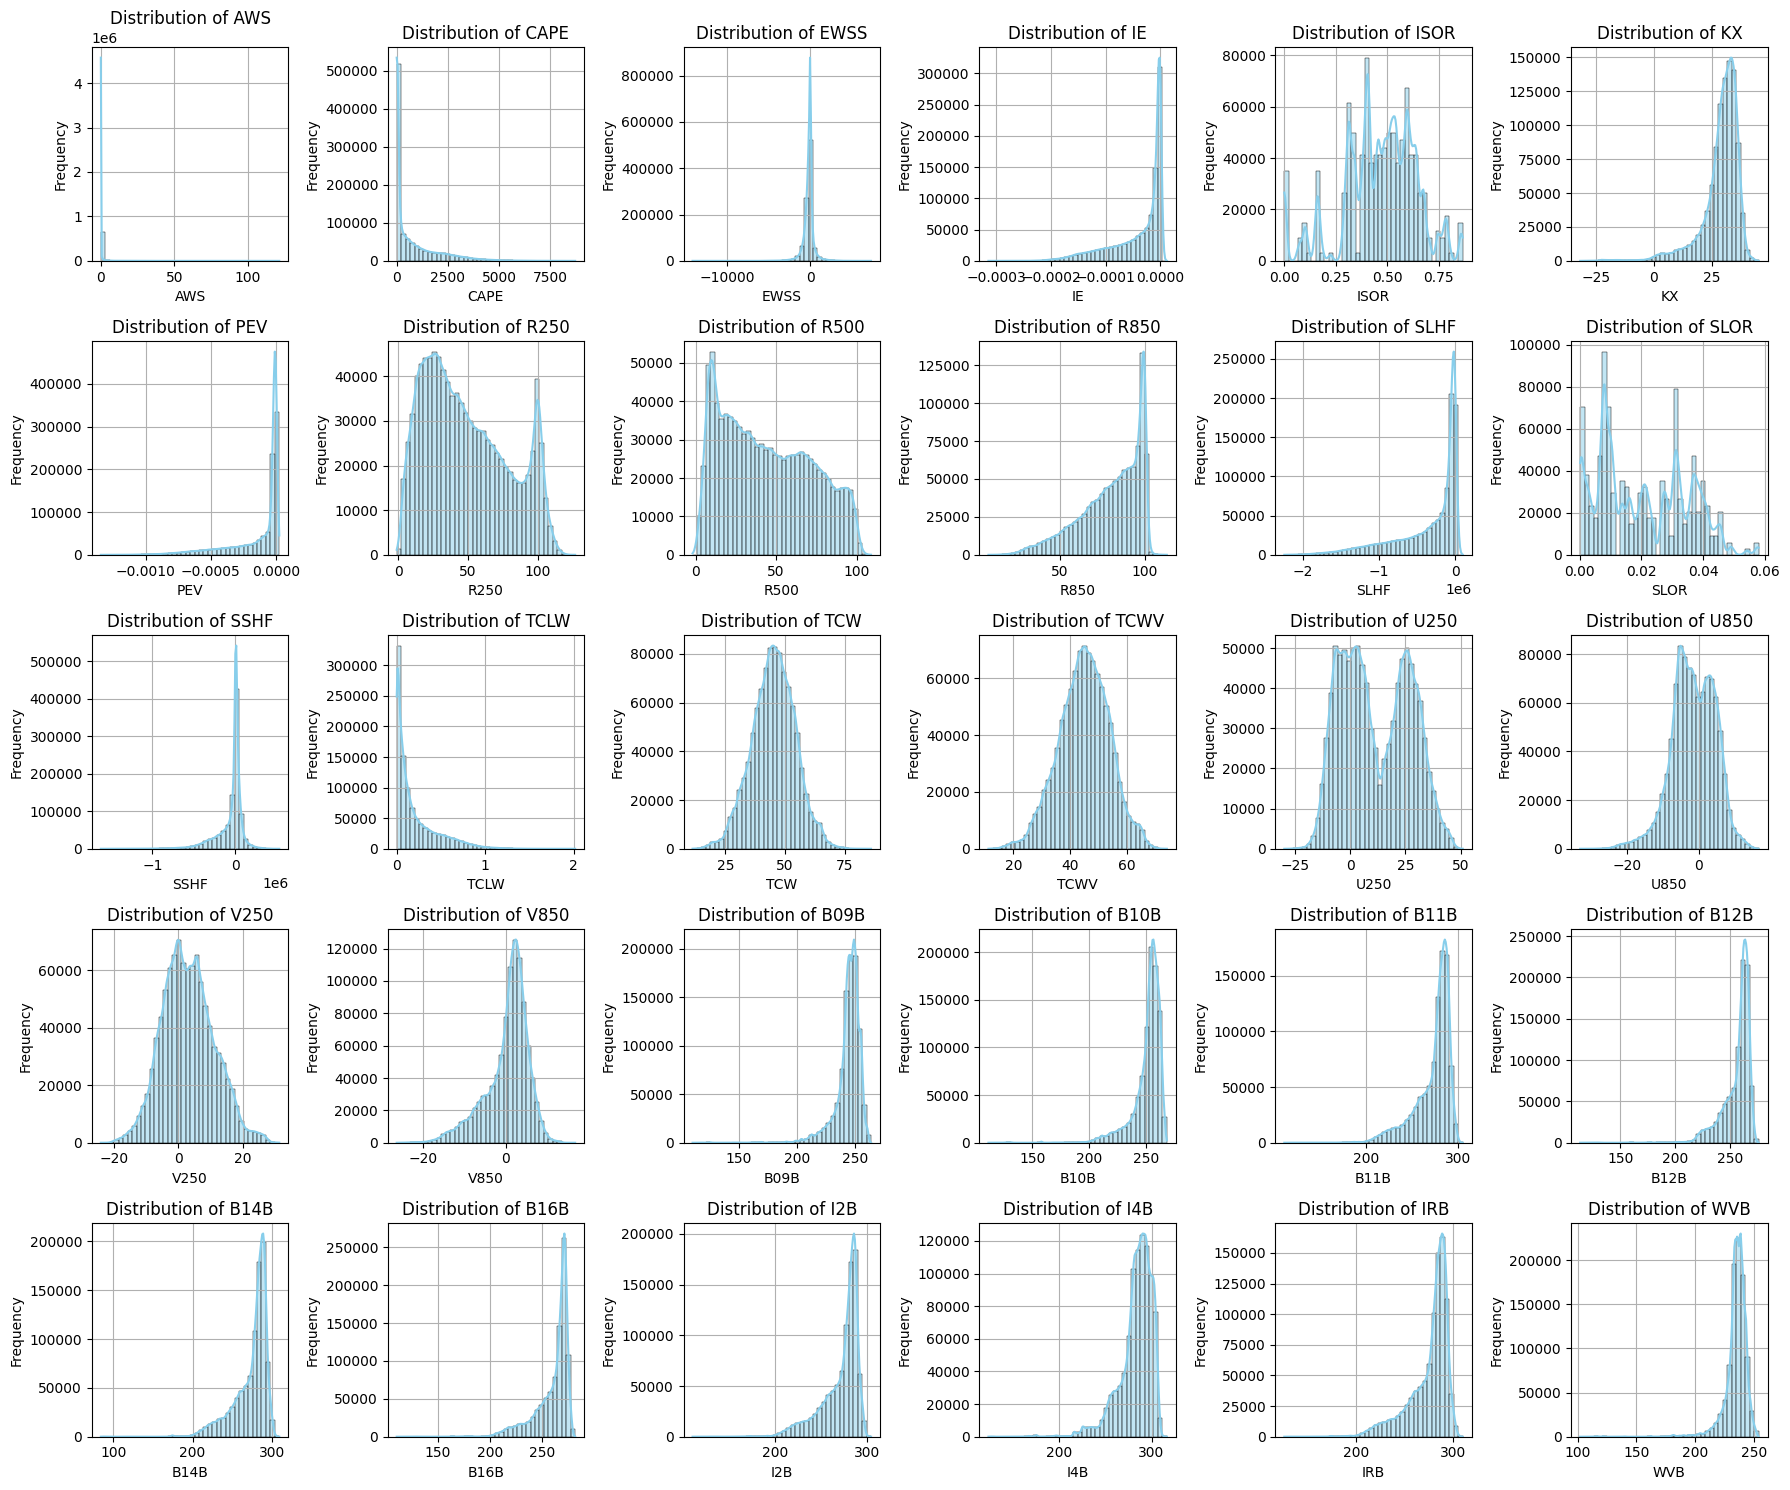

In [13]:
feature = ['AWS', 'CAPE', 'EWSS', 'IE', 'ISOR','KX', 'PEV', 'R250', 'R500', 'R850', 'SLHF', 'SLOR', 'SSHF', 'TCLW', 'TCW', 'TCWV', 'U250', 'U850', 'V250', 'V850',
       'B09B', 'B10B', 'B11B', 'B12B', 'B14B', 'B16B', 'I2B', 'I4B', 'IRB','WVB']
num_cols = len(feature)

num_rows = (num_cols // 6) + (1 if num_cols % 6 != 0 else 0)
num_cols_subplot = min(num_cols, 6)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_subplot, figsize=(18, num_rows * 3))
axes = axes.flatten() 

for i, col in enumerate(feature):
    ax = axes[i]
    sns.histplot(data[col], kde=True, bins=40, color='skyblue', ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.grid(True)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

1. Biến có phân phối lệch mạnh hoặc chứa ngoại lệ lớn
* AWS: nhiều giá trị 0, vài giá trị rất lớn -> outlier rõ
* CAPE: lệch phải mạnh, đa số ở gần 0, đuôi dài
* EWSS: lệch trái nặng, có vài giá trị rất âm
* SLHF, SSHF: có giá trị cực âm rất lớn -> nhiễu
* TCLW: lệch phải mạnh, đa số gần 0
=> Cắt ngưỡng

2. Biến có phân phối đối xứng hoặc gần chuẩn
* TCWV, TCW: phân phối chuẩn đẹp
* U850, V250, V850: Đối xứng, hơi lệch nhẹ, dùng trực tiếp được
* R250, R850: Hơi lệch nhưng vẫn có dạng chuông ổn định
* PEV, IE: Tập trung quanh 0, lệch nhẹ

3. Biến gió tầng cao (U250, V250)
* U250, V250: phân phối 2 đỉnh (bimodal) -> 2 chế độ gió khác nhau -> đặc trưng khí hậu quan trọng nên giữ nguyên

=> Không nên chuẩn hóa theo z-score thông thường; thay vào đó nên dùng robust scaler hoặc clustering để tách nhóm.

4. Các kênh phổ vệ tinh (B09B–IRB, WVB)
* B09B–IRB: Hầu hết có đỉnh rõ, lệch phải nhẹ hoặc mạnh
* B12B, B14B, I4B, IRB: Lệch mạnh → cần chuẩn hóa log hoặc clip
* WVB: Đỉnh rõ, lệch nhẹ, không có outlier

=> Dùng MinMaxScaler

## 3.4 Minh họa heat map

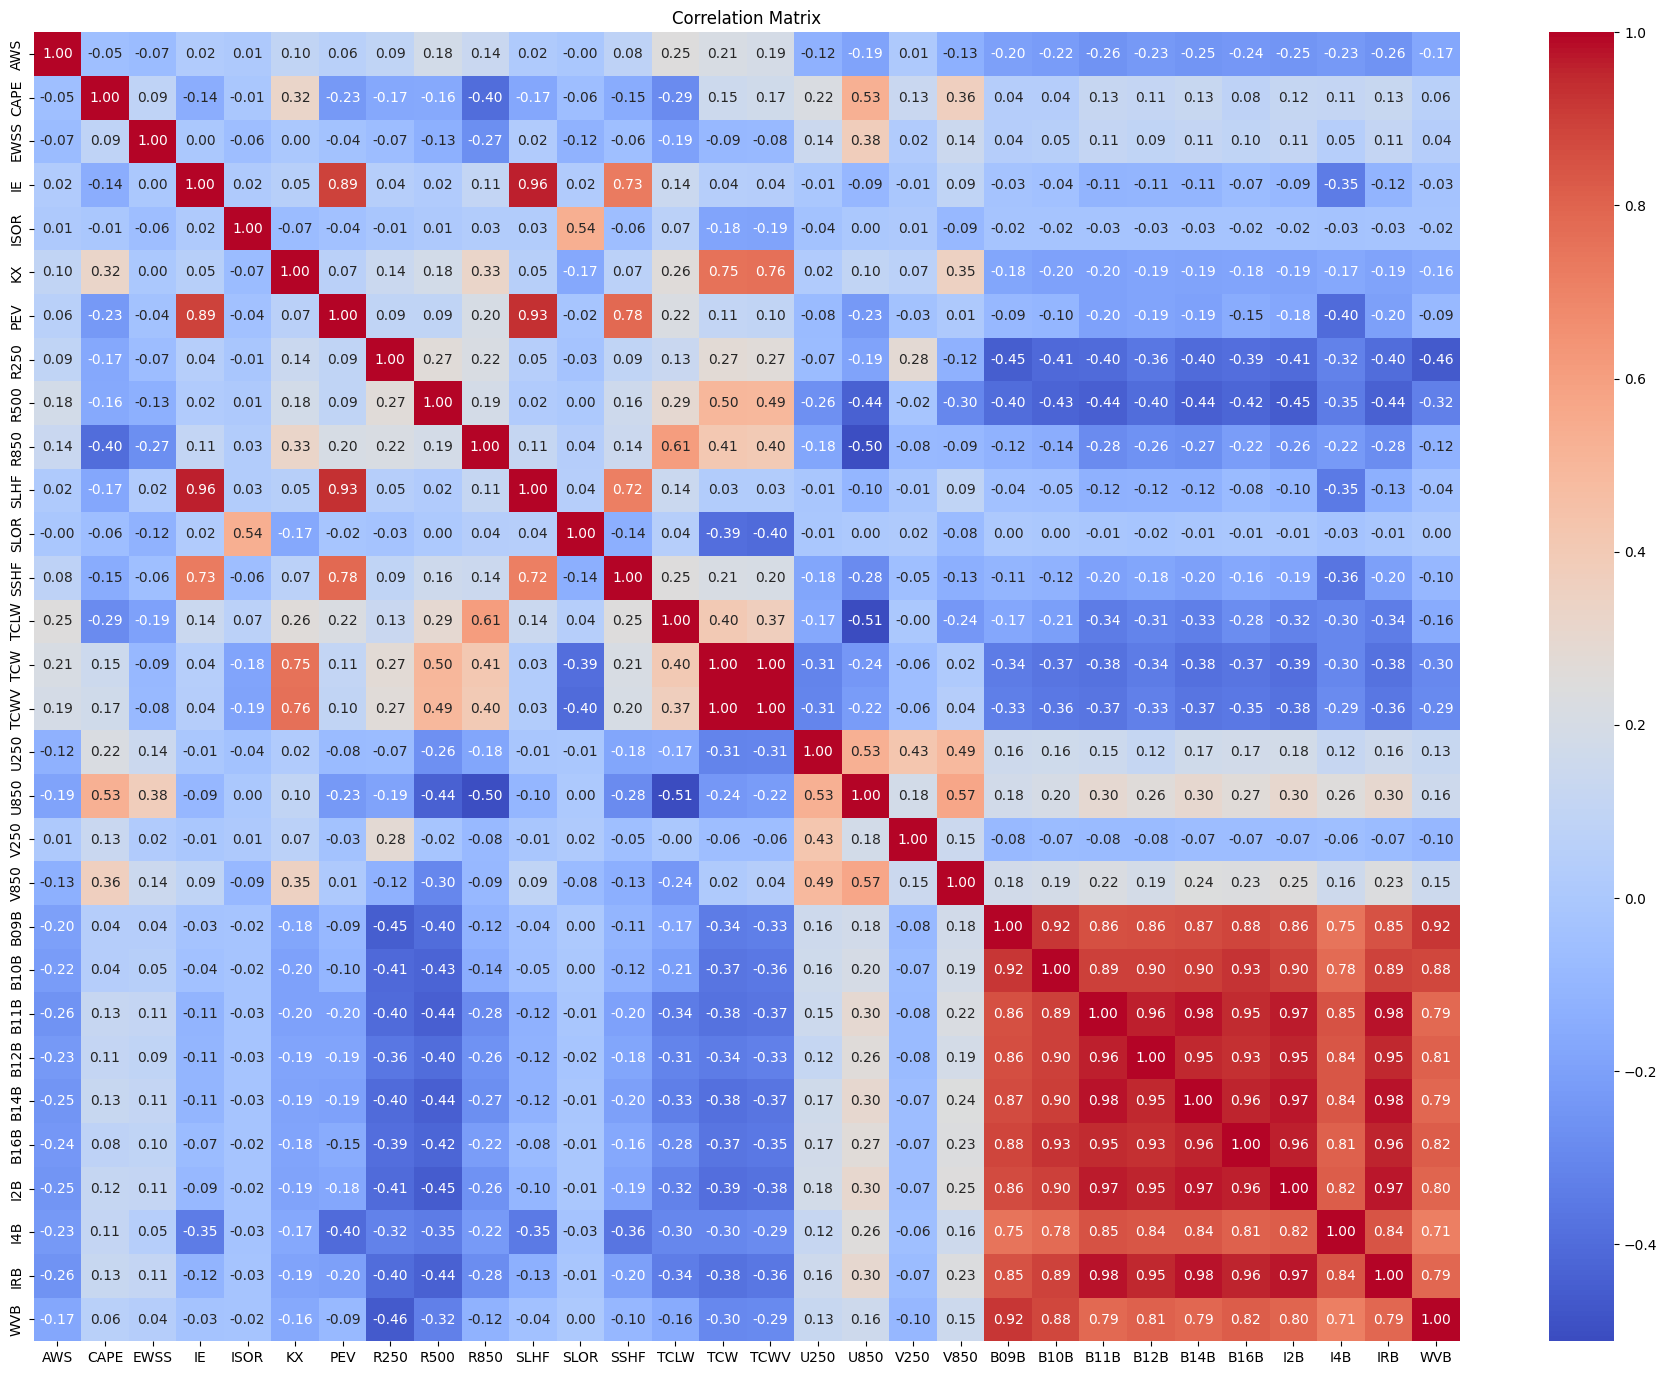

In [17]:
plt.figure(figsize=(23, 17))
corr = data[feature].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Nhóm kênh phổ vệ tinh (Band):
* Các biến như B09B, B10B, B11B, B12B, B14B, B16B, I2B, I4B, IRB, WVB có tương quan rất cao với nhau (từ 0.85–0.99) 

=> dư thừa thông tin

=> nên cân nhắc chọn một vài đại diện tiêu biểu hoặc dùng PCA để giảm chiều.

Tập biến về hơi ẩm – mây – nước:
* TCW, TCWV, TCLW tương quan tốt với nhau (0.6–0.8), gợi ý về cùng hiện tượng vật lý  => có thể ảnh hưởng đến khả năng mưa.

Cặp biến động năng khí quyển:
* EWSS, IE, SLHF, SSHF, PEV… tương quan mạnh với nhau và có xu hướng liên kết với điều kiện mưa.

## 3.5 Phân bố nhãn AWS

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


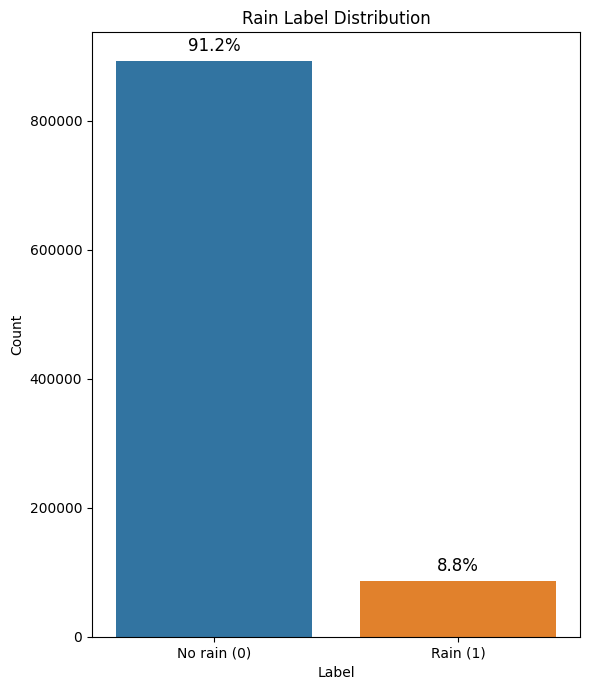

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Gắn nhãn: 0 = không mưa, 1 = có mưa
data['Rain_Label'] = (data['AWS'] > 0).astype(int)

# Đếm số lượng từng nhãn
label_counts = data['Rain_Label'].value_counts().sort_index()  # Đảm bảo theo thứ tự 0,1
labels = ['No rain (0)', 'Rain (1)']
counts = [label_counts[0], label_counts[1]]
total = sum(counts)
percentages = [f'{(c / total * 100):.1f}%' for c in counts]

# Vẽ biểu đồ
plt.figure(figsize=(6, 7))
ax = sns.barplot(x=labels, y=counts)

# Ghi phần trăm trên từng cột
for i, (count, pct) in enumerate(zip(counts, percentages)):
    ax.text(i, count + total * 0.01, pct, ha='center', va='bottom', fontsize=12, fontweight='normal')

plt.title('Rain Label Distribution')
plt.ylabel('Count')
plt.xlabel('Label')
plt.tight_layout()
plt.show()